# UC San Diego: Data Science in Practice
## Group 18 - Hate Crimes in San Diego 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [`X`] NO - keep private



## Video Link
- https://drive.google.com/file/d/14tqndIvHU3ZZTumN1OMYO9GzBqkRhCP8/view

# Names

- Rawan Ghazouli
- Jana Bridi
- Nargis Ahmadi

# Overview

The main objective of our project was to explore the relationship between hate crimes based on racial prejudice and those motivated by sexual orientation in San Diego County over the past seven years. By conducting thorough data analysis and employing Fisher’s statistical test, we assessed the prevalence of these hate crimes and examined any potential patterns or trends. Additionally, we analyzed the severity of these crimes, providing valuable insights for policymakers, the San Diego community, and the police department to promote a safer and more inclusive environment for all individuals, regardless of their racial background.

<a id='research_question'></a>
# Research Question

* Are hate crimes motivated by racial prejudice alone significantly more prevalent than hate crimes motivated by sexual orientation in the distribution of hate crimes in San Diego in the past 7 years?


<a id='background'></a>

## Background & Prior Work

Hate crime has been a challenge in society for a long time because it inflicts harm on individuals and the community as a whole. Understanding the association between hate crime incidents is important to prevent further changes. This research aims to investigate the correlation between hate crime incidents and the socioeconomic factors in the city of San Diego. The state of California defines hate crimes as criminal acts against an individual based on their gender, sexual orientation, race, religion, ancestry, national origin, or disability [1].

Several articles explore the motivation behind hate crimes. The San Diego Union-Tribune shows the significant increase in hate crime in San Diego County. According to the article from 2014-2018, the majority of motivation for hate crimes was sexual orientation followed by race. [1] The issue with data from the San Diego Union Tribune is the lack of Latino hate crimes which gives an incomplete picture of hate crimes in San Diego according to Fernando Tafoya, president of San Diego La Raza Lawyers Association [2]. The article emphasizes the need to understand the motivations behind hate crimes, such as racial prejudice, homophobia, and religious bias. The data reveal that hate crimes were reported in more than 20 communities across the county, with incidents ranging from assaults to vandalism and threatening phone calls.[1]

According to the article from the time of San Diego from 2018-2019, the majority of hate crimes were against race [2]. The article highlights that hate crimes motivated by race have become more prevalent compared to previous years. The article explores the effects of events such as the pandemic and January 6th that led to the increase in hate crimes [2].

References:
- [1] Winkley, L., & Schroeder, L. (2019, August 30). Project explores all hate crimes reported between 2014 and 2018, illustrating what kinds of incidents occur in the region and where. The San Diego Union-Tribune. https://www.sandiegouniontribune.com/news/public-safety/story/2019-08-30/five-years-of-hate-crimes-in-san-diego-county-cataloged
- [2] August, J. W. (2022, January 5). New Data Shows 'Statistically Significant' Rise in Hate Crimes in San Diego County. Times of San Diego. https://timesofsandiego.com/crime/2022/01/05/new-data-shows-statistically-significant-rise-in-hate-crimes-in-san-diego-county/


# Hypothesis


- For our research/alternative hypothesis, we hypothesize  hate crimes motivated by racial prejudice occur more frequently compared to hate crimes motivated by sexual orientation. 
- As for the null hypothesis, we hypothesize that there is no significant difference in the frequency of hate crimes motivated by racial prejudice compared to hate crimes motivated by sexual orientation.

# Dataset(s)

- Dataset Name: Hate Crimes Dataset
- Link to the dataset: https://data.sandiego.gov/datasets/police-hate-crimes/
- Number of observations: 266

The hate crime dataset includes the data points of hate crime incidents that happened from 2016 to 2022. It was obtained directly from the San Diego Police Department website. The number of incidents is 266 alongside numerous data points available for analysis but not limited to the following: exact year and time of the crime, victim/suspect backgrounds, crime type, date, location, and particularly the reported motives for the crime committed which includes that motivation factors which are needed for our analysis.

# Ethics & Privacy

Ensure that the dataset used for our analysis is properly anonymized and does not contain personally identifiable information that could potentially identify victims, suspects, or any individuals involved. This might contribute to protecting privacy and confidentiality. Since all the data collected does not contain personal or private information and the data is available to the public, then no breach of privacy in this project. Also, the case number (incident identifiers) would be removed from the dataset to keep the information more secure.

# Data Wrangling

The dataset was retrieved directly as a CSV file, uploaded on Jupyter Notebook, and examined using the Python language 

In [18]:
## YOUR CODE HERE

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

# upload the dataset into Github public repository which contain the datset is in CSV file
# use the following code to load and explore the dataset
data_path = 'https://raw.githubusercontent.com/wanzouli/team18_selfcreated/main/hate_crimes_datasd.csv'
df = pd.read_csv(data_path)

df.head()      # display the first few rows of the dataset

,case_number,date,year,month,time,date_time,crime_code,crime,block,street,...,suspect_sex_1,suspect_sex_2,victim_race_0,victim_race_1,victim_race_2,victim_race_3,victim_sex_0,victim_sex_1,victim_sex_2,victim_sex_3
0,16000456,2016-01-04,2016,1,2:00:00 AM,2016-01-04,243(D)M,"Assault, No Weapon",500.0,G,...,M,M,O,NaN,NaN,NaN,M,NaN,NaN,NaN
1,16001278,2016-01-10,2016,1,1:30:00 AM,2016-01-10,245A1,"Assault, w/Weapon",3400.0,30th,...,M,M,B,NaN,NaN,NaN,M,NaN,NaN,NaN
2,16004522,2016-01-31,2016,1,02:30:00,2016-01-31,594(B)(4),Vandalism,1400.0,Imperial,...,NaN,NaN,H,W,NaN,NaN,F,M,NaN,NaN
3,16005962,2016-02-09,2016,2,4:30:00 PM,2016-02-09,422.22(a)(4),"Threat, Phone Call",4100.0,Ute,...,NaN,NaN,B,NaN,NaN,NaN,M,NaN,NaN,NaN
4,16005900,2016-02-10,2016,2,00:45:00,2016-02-10,417A1:M,Threat,100.0,University,...,NaN,NaN,B,A,NaN,NaN,M,F,NaN,NaN


In [19]:
df.info()      # summary information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_number         266 non-null    int64  
 1   date                266 non-null    object 
 2   year                266 non-null    int64  
 3   month               266 non-null    int64  
 4   time                266 non-null    object 
 5   date_time           266 non-null    object 
 6   crime_code          266 non-null    object 
 7   crime               266 non-null    object 
 8   block               258 non-null    float64
 9   street              266 non-null    object 
 10  type                252 non-null    object 
 11  beat                266 non-null    int64  
 12  command             266 non-null    object 
 13  weapon              266 non-null    object 
 14  motivation          266 non-null    object 
 15  number_of_suspects  266 non-null    object 
 16  suspect 

In [20]:
df.describe()  # descriptive statistics of numerical columns

,case_number,year,month,block,beat,victim_count
count,2.660000e+02,266.000000,266.000000,258.000000,266.000000,265.000000
mean,1.885842e+07,2018.823308,6.003759,4318.627907,488.439850,1.200000
std,2.091110e+06,2.078366,3.304083,3187.443564,248.035432,0.523682
min,1.600046e+07,2016.000000,1.000000,0.000000,111.000000,0.000000
25%,1.701528e+07,2017.000000,3.000000,1625.000000,246.000000,1.000000
50%,1.900478e+07,2019.000000,6.000000,4000.000000,521.000000,1.000000
75%,2.101681e+07,2021.000000,9.000000,5775.000000,627.000000,1.000000
max,2.260380e+07,2022.000000,12.000000,13300.000000,935.000000,4.000000


# Data Cleaning

The cleanup started by only studying 5 columns from the dataset:
- year; the incident year  
- crime; description of crime code
- motivation; the bias motivation for hate crime
- weapon; type of weapon used in crime
- injury; victim level of treatment

The focus of our research question was mainly investigating the factors of race and sexual orientation which were the only two selected from the motivation column 

Another essential step in the cleaning process involved eliminating missing values and verifying the validity of all inputs to ensure there are no errors, such as typos or misspellings


In [21]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# to select the columns that we need to answer our research question 

df = df.loc[:, ['year', 'crime', 'motivation', 'weapon', 'injury']]
df.head() 

# keep only 'Race' and 'Sexual Orientation' in motivation column 
values_to_keep = ['Race','Sexual Orientation']
motivation_data = df[df['motivation'].isin(values_to_keep)]


#remove any missing values from the motivation column 
motivation_data = motivation_data.dropna(subset=['motivation'])

motivation_data.shape
motivation_data.head(40)

,year,crime,motivation,weapon,injury
0,2016,"Assault, No Weapon",Race,"Hands, Fists, Feet",Hospital
1,2016,"Assault, w/Weapon",Race,Stick,No Treat.
2,2016,Vandalism,Race,Marker,None
3,2016,"Threat, Phone Call",Race,Phone,None
4,2016,Threat,Race,Knife,None
5,2016,Vandalism,Race,Paint,None
8,2016,"Assault, No Weapon",Race,"Hands, Fists, Feet",No Treat.
9,2016,Threat,Race,Knife,None
10,2016,Other,Race,Knife,None
11,2016,"Threat, Phone Call",Race,Phone,None


# Data Visualization

The visualization for the dataset using a barplot displayed a higher count of hate crimes that are motivated by racial prejudice compared to those motivated by sexual orientation; 
- racial prejudice (~120) 
- sexual orientation (~60)

This observation highlights a primary interpretation that racial hate crimes have been more prevalent in the past 7 years than those targeting sexual orientation.



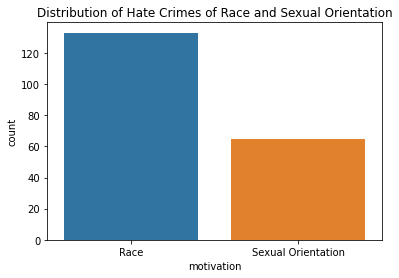

In [22]:
# create visualizations to explore the distribution of hate crimes by race and sexual orientation
sns.countplot(x='motivation', data= motivation_data)
plt.title('Distribution of Hate Crimes of Race and Sexual Orientation')
plt.show()

# Data Analysis & Results

### Proportions
These proportions represent the distribution of hate crimes in the dataset with respect to the two motivations: racial prejudice and sexual orientation. The values suggest that a higher proportion of hate crimes are motivated by racial prejudice (67.17%) compared to those motivated by sexual orientation (32.83%) in this dataset and under our analysis.
- Hate crimes motivated by Race: 67.17%
- Hate crimes motivated by Sexual Orientation: 32.83%

In [23]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

motivation_counts = motivation_data['motivation'].value_counts() 
motivation_proportions = motivation_data['motivation'].value_counts(normalize=True) 
motivation_proportions

print("Counts of 'motivation' values:")
print(motivation_counts) 

print("Proportions of 'motivation' values:") 
print(motivation_proportions)

Counts of 'motivation' values:
Race                  133
Sexual Orientation     65
Name: motivation, dtype: int64
Proportions of 'motivation' values:
Race                  0.671717
Sexual Orientation    0.328283
Name: motivation, dtype: float64


### The distribution of Race and Sexual Orientaiton as hate crime factors in San Diego in the past 7 years

- From the 'Trendline of Hate Crimes based on Motivation across 7 Years' graph we can observe that there is a higher rate of hate crimes towards race compared to sexual orientation in general.
- Major difference between the distributions of these two factors from 2019 to 2022; with race getting a higher rate and sexual orientation getting a lower rate.
- In 2019 both race and sexual orientation had a low number of hate crimes this could be due to external confound because of COVID-19.
- After the year 2021 we can see that there was less number of sexual orientation hate crimes almost to 0 while race hate crimes continued to increase.

Trendline of Hate Crimes based on Motivation:
      Race  Sexual Orientation
year                          
2016  22.0                14.0
2017  18.0                11.0
2018  21.0                13.0
2019   8.0                 8.0
2020  17.0                 7.0
2021  26.0                12.0
2022  21.0                 NaN


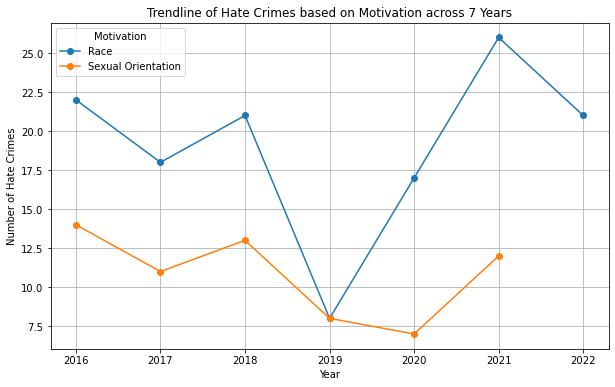

In [12]:
# group the data by 'year' and 'motivation' and count the number of hate crimes in each group
motivation_counts_by_year = motivation_data.groupby(['year', 'motivation'])['crime'].count().unstack()

# create a table to display the trendline of hate crimes based on motivation over the years
trendline_table = pd.DataFrame(motivation_counts_by_year)

# rename the columns for clarity
trendline_table.columns = ['Race', 'Sexual Orientation']

# display the trendline table
print("Trendline of Hate Crimes based on Motivation:")
print(trendline_table)

# plot the trendline for 'Race' and 'Sexual Orientation' motivations over the years
motivation_counts_by_year.plot(marker='o', linestyle='-', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.title('Trendline of Hate Crimes based on Motivation across 7 Years')
plt.legend(title='Motivation', loc='best')
plt.grid(True)
plt.show()

### Test Statistic (Fisher Test) 
\
Upon applying the Fisher test as a statistic test we were able to get the following p-value; 1.0511172264361364e-11 < 0.05

Such a small p-value indicates strong evidence against the null hypothesis, suggesting that the observed association between the two categorical variables (racial prejudice and sexual orientation) is not due to random chance but is statistically significant. This finding in this statistical test points out that hate crimes motivated by racial prejudice alone are notably more prevalent than hate crimes motivated by sexual orientation in the distribution of hate crimes in San Diego in the past 7 years.

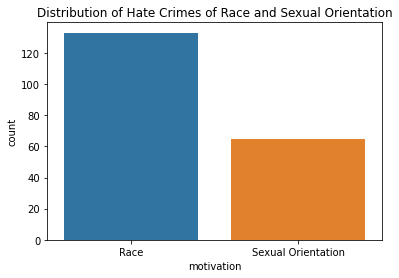

Percentage of Hate Crimes based on Motivation:
Race                  67.171717
Sexual Orientation    32.828283
Name: motivation, dtype: float64
Fisher's exact test results:
Odds Ratio: 4.186745562130177
p-value: 1.0511172264361364e-11


In [14]:
# count the number of hate crimes for each motivation category
motivation_counts = motivation_data['motivation'].value_counts()

# create visualizations to explore the distribution of hate crimes by race and sexual orientation
sns.countplot(x='motivation', data= motivation_data)
plt.title('Distribution of Hate Crimes of Race and Sexual Orientation')
plt.show()

# calculate the percentage of hate crimes for each motivation category
motivation_percentages = (motivation_counts / len(motivation_data)) * 100

# display the percentage of hate crimes for each motivation category
print("Percentage of Hate Crimes based on Motivation:")
print(motivation_percentages)

# calculate the total number of hate crimes
total_hate_crimes = len(motivation_data)


racial_hate_crimes = len(motivation_data[motivation_data['motivation'] == 'Race'])

sexual_orientation_hate_crimes = len(motivation_data[motivation_data['motivation'] == 'Sexual Orientation'])


odds_ratio, p_value = fisher_exact([[racial_hate_crimes, sexual_orientation_hate_crimes],
                                    [total_hate_crimes - racial_hate_crimes, total_hate_crimes - sexual_orientation_hate_crimes]])

print("Fisher's exact test results:")
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

### The Distribution of Weapon Use: Comparing Race and Sexual Orientation Factors in Hate Crime Motivations"
- From the 'Frequency of Weapons Used for Hate Crimes' graph, we can notice that race based hate crimes showed a broader range of severe weapons, including "Knife," "Hands, Fists, Feet," and "Spray Paint."
- Sexual orientation based hate crimes had a relatively lower frequency of severe weapons, with "Hands, Fists, Feet" being the most common.
- This finding delivers the same notion of how the frequency of weapons used is more severe towards race than sexual orientation hate crimes. 

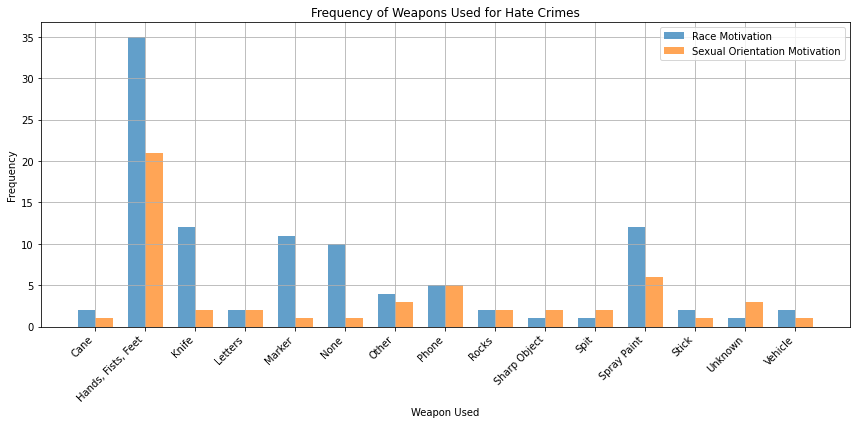

In [15]:
data = {
    'Weapon': ['Cane', 'Hands, Fists, Feet', 'Knife', 'Letters', 'Marker', 'None',
               'Other', 'Phone', 'Rocks', 'Sharp Object', 'Spit', 'Spray Paint',
               'Stick', 'Unknown', 'Vehicle'],
    'Race': [2.0, 35.0, 12.0, 2.0, 11.0, 10.0, 4.0, 5.0, 2.0, 1.0, 1.0, 12.0, 2.0, 1.0, 2.0],
    'Sexual Orientation': [1.0, 21.0, 2.0, 2.0, 1.0, 1.0, 3.0, 5.0, 2.0, 2.0, 2.0, 6.0, 1.0, 3.0, 1.0]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(df))
plt.bar(index, df['Race'], bar_width, label='Race Motivation', alpha=0.7)
plt.bar([i + bar_width for i in index], df['Sexual Orientation'], bar_width, label='Sexual Orientation Motivation', alpha=0.7)

plt.xlabel('Weapon Used')
plt.ylabel('Frequency')
plt.title('Frequency of Weapons Used for Hate Crimes')
plt.xticks([i + bar_width/2 for i in index], df['Weapon'], rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Examining Injury Type Distribution in Hate Crimes: A Comparative Analysis of Race and Sexual Orientation Factors

From the 'Distribution of Victim Injuries for Hate Crimes' graph, we can detect how hate crimes motivated by race show a higher incidence of hospital injuries, and therefore we observe in our data analyzation and that the injuries for race-motivated hate crimes are more severe than sexual orientation overall. 

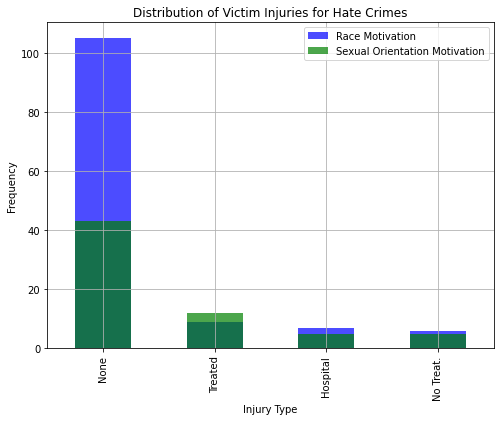

In [17]:
plt.figure(figsize=(8, 6))
motivation_data[motivation_data['motivation'] == 'Race']['injury'].value_counts().plot(kind='bar', color='blue', alpha=0.7, label='Race Motivation')
motivation_data[motivation_data['motivation'] == 'Sexual Orientation']['injury'].value_counts().plot(kind='bar', color='green', alpha=0.7, label='Sexual Orientation Motivation')
plt.xlabel('Injury Type')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Injuries for Hate Crimes')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion & Discussion

The goal of this project was to investigate the correlation between hate crimes motivated by racial prejudice and sexual orientation in San Diego County over the past 7 years. Our data analysis revealed that hate crimes motivated by racial prejudice occurred more frequently, constituting 67.71% of the hate crime dataset, while hate crimes motivated by sexual orientation accounted for only 32.83% during the same period. 

Additionally, the trendline analysis showed that hate crimes motivated by racial prejudice were consistently high from 2016 to 2022, with a notable decline in 2019. This decline might be attributed to external factors such as the COVID-19 pandemic, potentially affecting data collection and hate crime incidents due to quarantine and social isolation. Future analyses should take this confounding factor into consideration. 

Using Fisher’s test, we tested the hypothesis and found a significant association between hate crimes motivated by racial prejudice and sexual orientation. The small p-value of approximately 1.05 e-11 (1.05 x 10^-11), smaller than the significance level of alpha=0.05, led us to reject the null hypothesis. This result suggests that hate crimes motivated by racial prejudice are more prevalent than those motivated by sexual orientation in San Diego over the past seven years. 

After rejecting the null hypothesis, our group delved deeper into the severity of hate crimes based on motivations and found that hate crimes motivated by racial prejudice involved more violent weapons such as knives, fists, and spray paint, whereas hate crimes motivated by sexual orientation primarily used hands and feet. This analysis suggests that hate crimes driven by racial prejudice pose a greater threat to victims compared to those motivated by sexual orientation. 
Furthermore, we examined the injuries resulting from hate crimes and their motivations. The prevalence of hospital injuries caused by racial hate crimes was higher compared to sexual orientation hate crimes, further supporting the evidence of the severity of race-related hate crimes. 

The implications of these results are crucial for San Diego County law enforcement, policymakers, institutions, and communities. The data highlights the need for improved prevention strategies and practices in addressing hate crimes, particularly those motivated by racial prejudice, as they constitute the majority of hate crimes in the region. 
However, there are some limitations to this analysis worth noting. The hate crime dataset acquired from the San Diego Police Department only includes reported hate crimes, potentially leaving unreported incidents unaccounted for. Consequently, this dataset may not fully represent all hate crimes that occurred in San Diego. Additionally, the dataset’s scope is limited to San Diego County and the past seven years, potentially not capturing broader hate crime trends in different regions or over a longer timeline. For future directions, expanding the dataset to include more recent data and incorporating socio-economic factors would help to better understand confounding variables and draw more concrete conclusions with a richer dataset. 

In conclusion, our analysis of the hate crime dataset from the previous seven years sheds light on the prevalence of hate crimes motivated by racial prejudice and sexual orientation in San Diego. Further analysis revealed the severity and characteristics of these two motivations, with racial prejudice hate crimes showing a higher prevalence and posing a greater concern for safety. This analysis underscores the need to address these hate crimes through policy changes, institutional reforms, and community engagement, fostering a safer and more inclusive environment for all individuals, regardless of their racial background. 